# Practice individual - Flourishing

## Goal : Apply the three steps of data analysis on the <Flourishing> dataset.

Exercise 1
Explore univariate descriptive analysis.

Exercise 2
Explore bivariate descriptive analysis.

Exercise 3
Apply supervised learning on a quantitative outcome variable (recommended: Flow). With a linear regression model and a K nearest neighbors regressor (KNN) model

Exercise 4
Apply supervised learning on a categorical outcome variable (recommended: Flow). With a logistic regression model and a K nearest neighbors classifier (KNN) model

Exercise 5
Apply unsupervised learning on the observations (rows).
Explore links between the emerging classes and the flourishing states and use it to draw a final interpretation.

Exercise 6
Apply unsupervised learning on the variables (columns).
See If you can draw some interpretation…


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import scipy.stats as stats

import warnings

warnings.filterwarnings("ignore")

import jupyter_black

jupyter_black.load()

In [82]:
os.getcwd()

'/Users/fulin/Documents/GitHub/EMLyon_DSAIS/Python Booster 01/Week3_Intro_ML/data'

In [83]:
PATH = (
    r"/Users/fulin/Documents/GitHub/EMLyon_DSAIS/Python Booster 01/Week3_Intro_ML/data"
)

In [84]:
# Change my workspace

os.chdir(PATH)

In [85]:
# import the data

df_ini = pd.read_excel("Flourishing_248_HD - Copy.xlsx")

In [86]:
df = df_ini.copy()

In [87]:
display(df.head(5))
display(df.info())
display(df.describe())

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


None

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,4.616935,1.608871,2.536290,2.052419,50.612903,2.225806,55.987903,1.812982,32.951613
std,155.254472,10.154568,1.538453,0.488990,0.757348,0.597967,13.431614,0.537481,11.613367,0.803469,6.599417
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,23.000000,0.384615,13.000000
25%,107.500000,34.000000,3.000000,1.000000,2.000000,2.000000,41.000000,2.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,5.000000,2.000000,3.000000,2.000000,50.000000,2.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,6.000000,2.000000,3.000000,2.000000,61.000000,3.000000,64.000000,2.170455,37.000000
max,513.000000,72.000000,6.000000,2.000000,3.000000,3.000000,82.000000,3.000000,83.000000,5.000000,48.000000


In [88]:
# Set the categorical columns's type to category

columns_cat_indices = [0, 3, 4, 5, 7]
df.iloc[:, columns_cat_indices] = df.iloc[:, columns_cat_indices].astype("category")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          248 non-null    category
 1   age         248 non-null    int64   
 2   education   248 non-null    int64   
 3   sex         248 non-null    category
 4   famstatus   248 non-null    category
 5   pro_cat     248 non-null    category
 6   pro_quant   248 non-null    int64   
 7   priv_cat    248 non-null    category
 8   priv_quant  248 non-null    int64   
 9   positivity  248 non-null    float64 
 10  flow        248 non-null    int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 23.8 KB


None

In [89]:
df.nunique()

ID            248
age            44
education       6
sex             2
famstatus       3
pro_cat         3
pro_quant      58
priv_cat        3
priv_quant     52
positivity    192
flow           33
dtype: int64

In [90]:
df.drop(columns=["ID"], axis=1, inplace=True)

In [91]:
def ceil_up(x):
    assert x >= 0
    if x <= 3:
        x = np.ceil(x)
    elif x > 3:
        x = 4
    return int(x)


df["pos_cat"] = df["positivity"].apply(ceil_up).astype("category")

## *Exercise 1* - Explore univariate descriptive analysis.

In [92]:
numerical_columns = df.select_dtypes(exclude=["category"])
categorical_columns = df.select_dtypes(include=["category"])
# print("Numerical Columns:")
# print(numerical_columns.columns.tolist())
# print("Categorical Columns:")
# print(non_numerical_columns.columns.tolist())

### Categorical 

In [93]:
def pie_bar(col, map, explode, colors):
    """
    A fonction to make a pie plot and a bar plot to show the distribution of a categorical column
    """

    col = col.map(map)

    label = col.value_counts().index
    size = col.value_counts().values

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), facecolor="white", dpi=80)
    ax[0].pie(
        size,
        labels=label,
        explode=explode,
        shadow=True,
        colors=colors,
        autopct="%1.1f%%",
        startangle=0,
    )
    ax[0].set_title(f"Pie-chart of {col.name}")
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel("Pct")

    ax[1].barh(label, size, color=colors)
    for i, v in enumerate(size):
        ax[1].text(v + 1, i, str(v), color="black", va="center")
    ax[0].set_title(f"Bar-chart of {col.name}")
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel("Count")

    # ax[1].tick_params(axis='y', labelrotation=90)
    # ax[1].set_yticklabels(label, rotation=90)

    plt.subplots_adjust(wspace=0.6)

    plt.show()

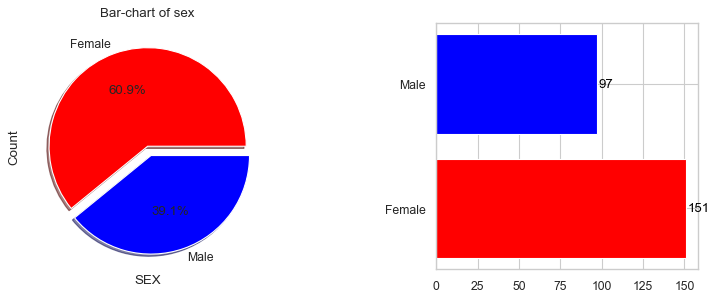

In [94]:
# Map of the projection
map = {1: "Male", 2: "Female"}

# I define the explode to make the pie plot more readable
explode = (0, 0.1)

colors = ["red", "blue"]

pie_bar(df["sex"], map, explode, colors)

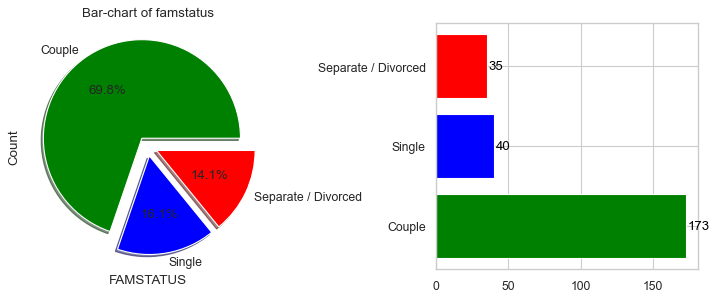

In [95]:
map = {1: "Single", 2: "Separate / Divorced", 3: "Couple"}
explode = (0.1, 0.1, 0.1)
colors = ["green", "blue", "red"]

pie_bar(df["famstatus"], map, explode, colors)

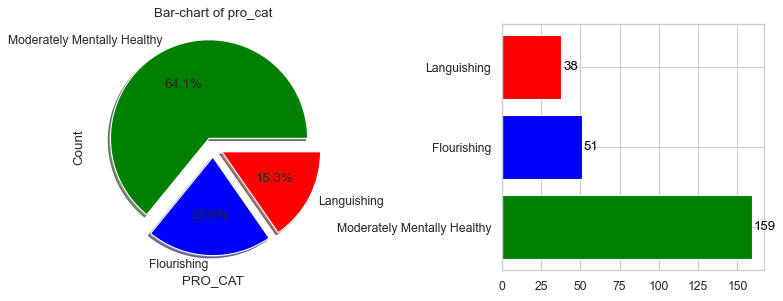

In [96]:
map = {1: "Languishing", 2: "Moderately Mentally Healthy", 3: "Flourishing"}
explode = (0.1, 0.1, 0.1)
colors = ["green", "blue", "red"]

pie_bar(df["pro_cat"], map, explode, colors)

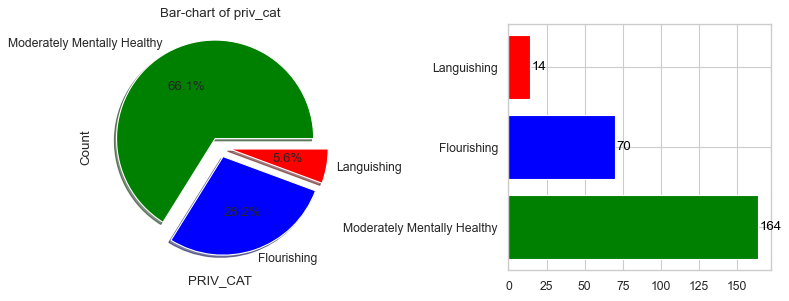

In [97]:
map = {1: "Languishing", 2: "Moderately Mentally Healthy", 3: "Flourishing"}
explode = (0.1, 0.1, 0.1)
colors = ["green", "blue", "red"]

pie_bar(df["priv_cat"], map, explode, colors)

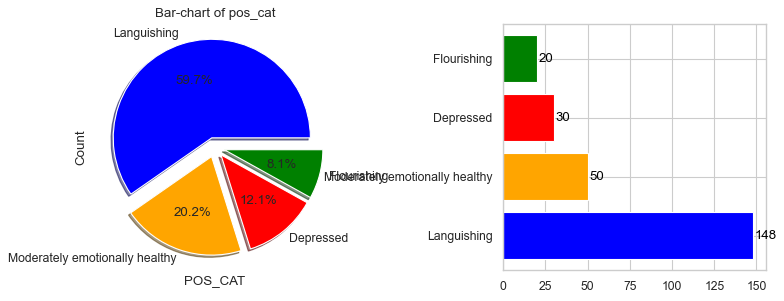

In [98]:
map = {
    1: "Depressed",
    2: "Languishing",
    3: "Moderately emotionally healthy",
    4: "Flourishing",
}
explode = (0.1, 0.1, 0.1, 0.1)
colors = ["blue", "orange", "red", "green"]

pie_bar(df["pos_cat"], map, explode, colors)

### Numerical

In [99]:
def hist_box(col):
    """
    This is a fonction to make histogram and box plot to explore the distribution of the numerical columns
    """
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), facecolor="white", dpi=100)

    # ax1
    sns.histplot(
        data=col, kde=True, bins=50, color="skyblue", edgecolor="black", ax=ax[0]
    )
    ax[0].set_title(f"Histogramme of {col.name}")
    ax[0].set_xlabel(col.name.upper())
    ax[0].set_ylabel("Count")

    # ax2
    boxplot = ax[1].boxplot(
        col, vert=True, patch_artist=True, boxprops={"facecolor": "lightcoral"}
    )

    # Find outliers and show the value on the figure
    outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
    for outlier in outliers:
        for value in outlier:
            ax[1].annotate(
                str(value),
                (1, value),
                textcoords="offset points",
                xytext=(10, 0),
                va="center",
                fontsize=8,
                color="red",
            )
    ax[1].set_title(f"Boxplot of {col.name}")
    ax[1].set_xlabel(col.name.upper())

    plt.tight_layout()
    plt.show()

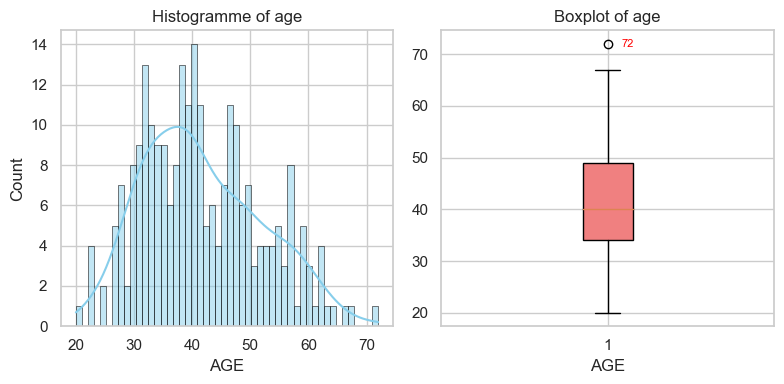

In [100]:
hist_box(df["age"])

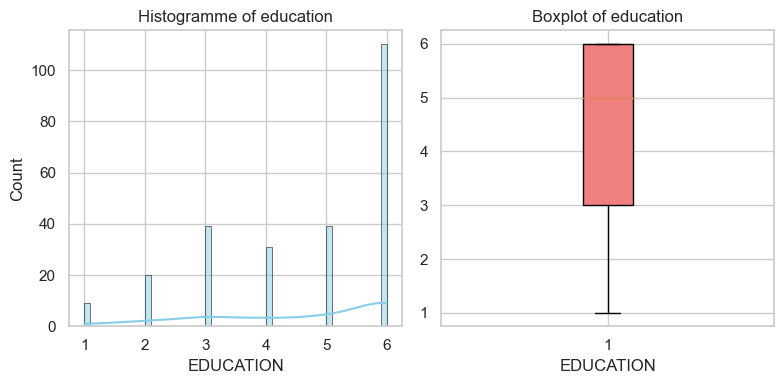

In [101]:
hist_box(df["education"])

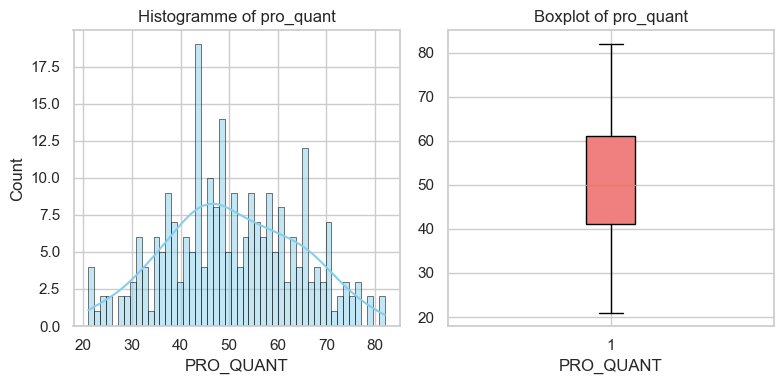

In [102]:
hist_box(df["pro_quant"])

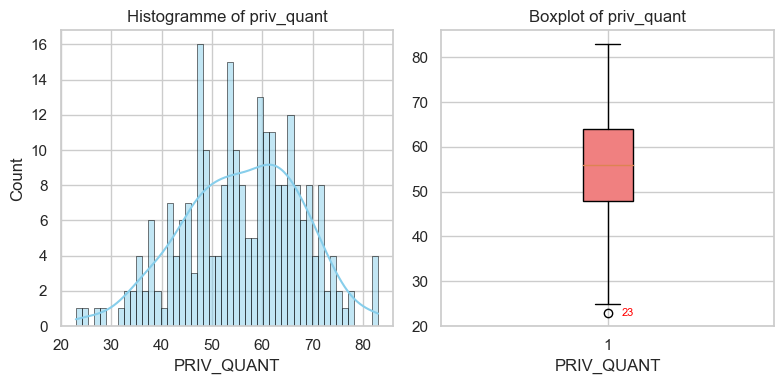

In [103]:
hist_box(df["priv_quant"])

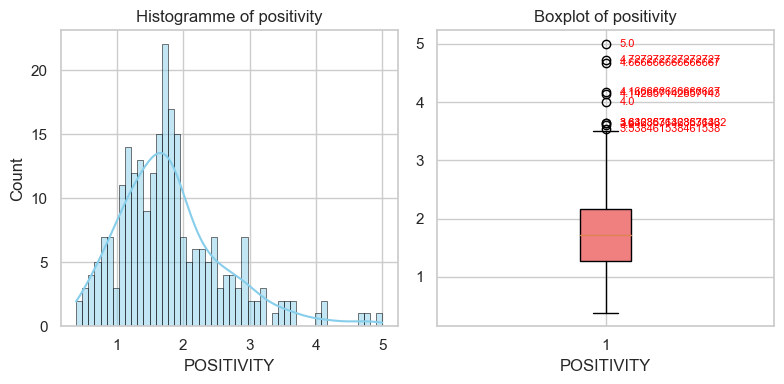

In [104]:
hist_box(df["positivity"])

---

## *Exercise 2* - Explore bivariate descriptive analysis.

Cramer's V : $$V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}$$

In [105]:
def cat_cat_analysis(data, var1, var2):
    """
    The fonction to check the relationship between two categorical variables
    By using the chi-squre and providing the carmens'v
    """

    # Generate the contingency table
    contingency_table = pd.crosstab(data[var1], data[var2])

    # Check the significance of their relationship with the chi-square test
    chi2, p, dof, expected_freq = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.values.sum()
    k = contingency_table.shape[0]
    r = contingency_table.shape[1]
    V = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    print("Cramer's V:", V)

    observed_table = contingency_table
    expected_table = expected_freq
    expected_table = pd.DataFrame(
        expected_freq, index=contingency_table.index, columns=contingency_table.columns
    )  # Convert expected_freq to a DataFrame

    n = contingency_table.values.sum()

    residual_table = (observed_table - expected_table) / np.sqrt(expected_table)

    print("Observed Table:")
    display(observed_table)
    print("\nExpected Table:")
    display(expected_table)
    print("\nResidual Table:")
    display(residual_table)

    print(f"\nChi-Squared Statistic: {chi2}, p-value: {p}, Degree of freedom : {dof}")
    significant_diff = p < 0.05
    print(f"\nSignificance({var1} and {var2}): {significant_diff}")

    # Plot side-by-side bar charts
    contingency_table.plot(kind="bar", stacked=True)
    plt.title(f"Side-by-Side Bar Chart for {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel("Frequency")
    plt.show()

    # Plot stacked bar charts
    contingency_table.T.plot(kind="bar", stacked=True)
    plt.title(f"Stacked Bar Chart for {var2} vs {var1}")
    plt.xlabel(var2)
    plt.ylabel("Frequency")
    plt.show()

In [106]:
def quant_quant_analysis(data, var1, var2):
    """
    The fonction to explore the correlation between two quantitive variables
    By providing the pairplot heatmap of the correlation matrix
    """

    sub_data = data[[var1, var2]]
    correlation_matrix = sub_data.corr()
    correlation, p_value = stats.pearsonr(sub_data[var1], sub_data[var2])

    # print(f"correlation matrix : {correlation_matrix}")
    print(f"correlation between {var1} and {var2} is: {correlation}")
    print(f"\nP-value is: {p_value}")
    significant_diff = p_value < 0.05
    print(f"\nSignificance({var1} and {var2}): {significant_diff}")

    # sns.set(style="ticks")
    sns.pairplot(sub_data, kind="scatter")
    plt.show()

    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        vmin=-1,
        vmax=1,
        cmap="YlGnBu",
        linewidths=3,
    )
    plt.show()

In [107]:
def quant_cat_analysis(data, quant_var, cat_var):
    """
    A fonction to discover the link from between a quantitive variable and a categorical variable
    By using ANOVA analysis
    """

    anova_table = pd.DataFrame(
        columns=["Source", "DF", "Sum of Squares", "Mean Square", "F", "PR(>F)"]
    )

    groups = data.groupby(cat_var)
    for group_name, group_data in groups:
        group_values = [group_data[quant_var].values for _, group_data in groups]
        f_statistic, p_value = stats.f_oneway(*group_values)
        df_between = len(groups) - 1
        df_within = len(data) - len(groups)
        ss_between = (group_data[quant_var].mean() - data[quant_var].mean()) ** 2 * len(
            group_data
        )
        ss_within = ((group_data[quant_var] - group_data[quant_var].mean()) ** 2).sum()
        ms_between = ss_between / df_between
        ms_within = ss_within / df_within
        anova_table = anova_table.append(
            {
                "Source": group_name,
                "DF": df_between,
                "Sum of Squares": ss_between,
                "Mean Square": ms_between,
                "F": f_statistic,
                "PR(>F)": p_value,
            },
            ignore_index=True,
        )

    print("ANOVA table:")
    display(anova_table)

    p_values = anova_table["PR(>F)"]
    significant_diff = p_values < 0.05
    # print(f"Significance({quant_var} and {cat_var}): {significant_diff}")
    print(f"Significance({quant_var} and {cat_var}):\n")
    display(significant_diff)

    sns.set(style="whitegrid")
    plt.figure(figsize=(2, 5))
    sns.boxplot(x=cat_var, y=quant_var, data=data, palette="Set3")

    plt.title(f"Grouped Boxplots for {quant_var} by {cat_var}")

    plt.show()

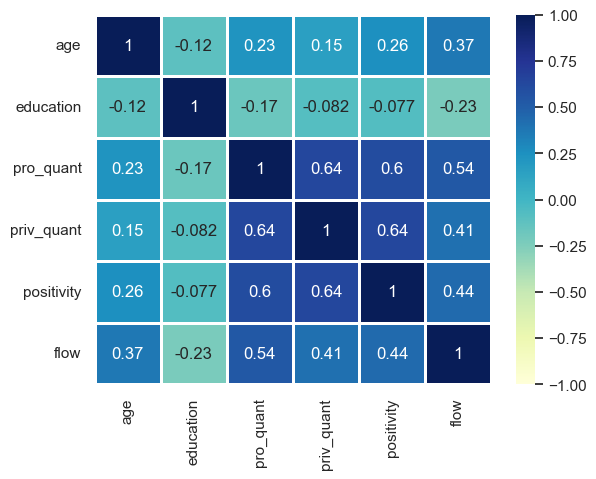

In [108]:
sns.heatmap(
    numerical_columns.corr(), annot=True, cmap="YlGnBu", linewidths=1, vmin=-1, vmax=1
);

In [109]:
df

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,72,6,2,2,3,82,3,83,4.142857,44,4
1,45,6,2,2,3,81,3,83,4.000000,44,4
2,43,5,1,1,3,79,3,78,5.000000,47,4
3,60,2,2,3,3,79,3,82,4.666667,42,4
4,49,2,2,2,3,77,3,73,2.285714,33,3
...,...,...,...,...,...,...,...,...,...,...,...
243,37,6,1,3,1,22,2,43,1.650000,21,2
244,31,6,2,3,1,21,2,35,0.384615,21,1
245,29,6,2,1,1,39,1,25,0.527778,33,1
246,59,5,1,2,1,31,1,28,0.585366,26,1


ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,1.0,12.850985,12.850985,0.483605,0.48745
1,2.0,1.0,8.255268,8.255268,0.483605,0.48745


Significance(flow and sex):



0    False
1    False
Name: PR(>F), dtype: bool

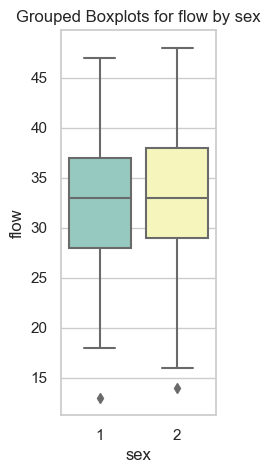

In [110]:
quant_cat_analysis(df, "flow", "sex")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,2.0,122.725911,61.362955,1.68928,0.186796
1,2.0,2.0,3.906831,1.953415,1.68928,0.186796
2,3.0,2.0,19.694624,9.847312,1.68928,0.186796


Significance(flow and famstatus):



0    False
1    False
2    False
Name: PR(>F), dtype: bool

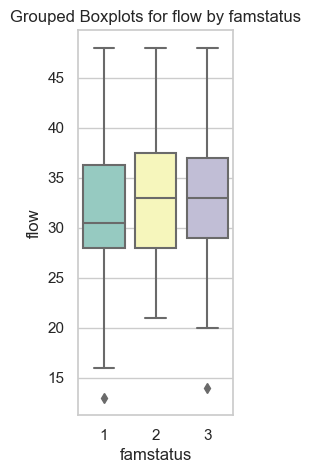

In [111]:
quant_cat_analysis(df, "flow", "famstatus")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,2.0,569.906457,284.953229,28.050154,1.073305e-11
1,2.0,2.0,83.619986,41.809993,28.050154,1.073305e-11
2,3.0,2.0,1350.770893,675.385447,28.050154,1.073305e-11


Significance(flow and pro_cat):



0    True
1    True
2    True
Name: PR(>F), dtype: bool

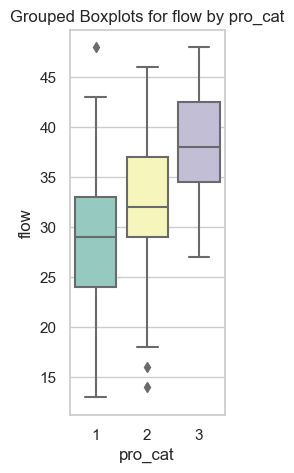

In [112]:
quant_cat_analysis(df, "flow", "pro_cat")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,2.0,460.836926,230.418463,16.816848,1.432929e-07
1,2.0,2.0,124.801560,62.400780,16.816848,1.432929e-07
2,3.0,2.0,712.882786,356.441393,16.816848,1.432929e-07


Significance(flow and priv_cat):



0    True
1    True
2    True
Name: PR(>F), dtype: bool

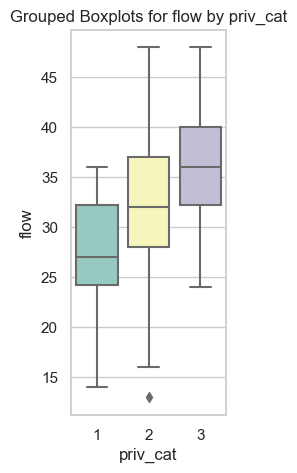

In [113]:
quant_cat_analysis(df, "flow", "priv_cat")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,3.0,958.221852,319.407284,20.448791,7.450157e-12
1,2.0,3.0,74.264561,24.754854,20.448791,7.450157e-12
2,3.0,3.0,567.301582,189.100527,20.448791,7.450157e-12
3,4.0,3.0,561.458117,187.152706,20.448791,7.450157e-12


Significance(flow and pos_cat):



0    True
1    True
2    True
3    True
Name: PR(>F), dtype: bool

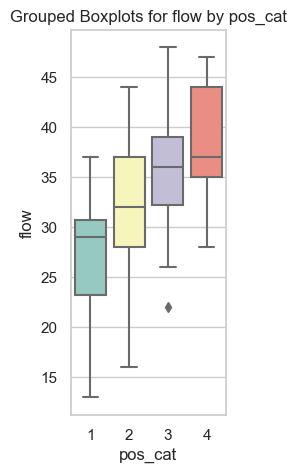

In [114]:
quant_cat_analysis(df, "flow", "pos_cat")

Cramer's V: 0.18250701609307357
Observed Table:


famstatus,1,2,3
sex,,,
1,17,6,74
2,23,29,99



Expected Table:


famstatus,1,2,3
sex,,,
1,15.645161,13.689516,67.665323
2,24.354839,21.310484,105.334677



Residual Table:


famstatus,1,2,3
sex,,,
1,0.342529,-2.078284,0.770090
2,-0.274533,1.665721,-0.617218



Chi-Squared Statistic: 8.26058510895296, p-value: 0.01607817439257878, Degree of freedom : 2

Significance(sex and famstatus): True


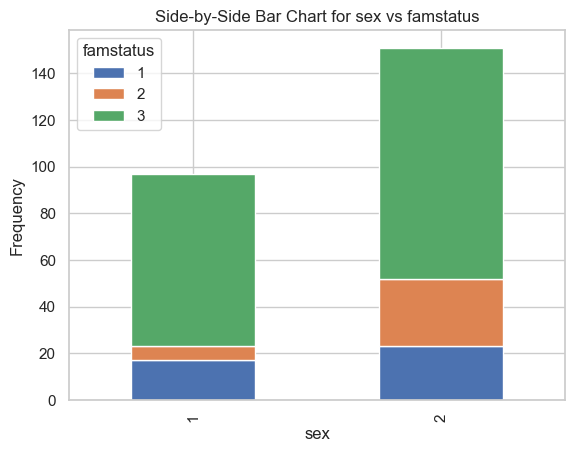

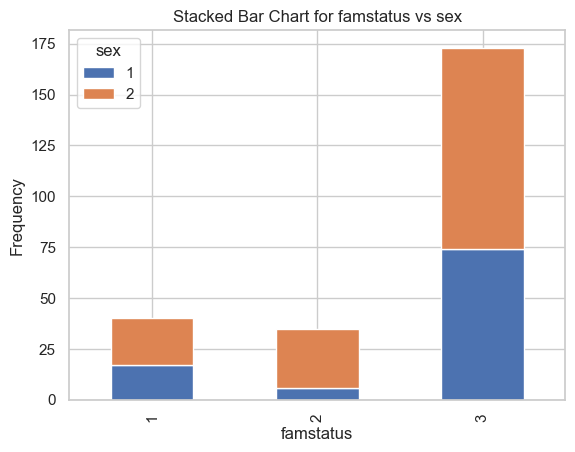

In [115]:
cat_cat_analysis(df, "sex", "famstatus")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,2.0,636.134886,318.067443,3.873112,0.022079
1,2.0,2.0,104.843601,52.421800,3.873112,0.022079
2,3.0,2.0,280.004711,140.002356,3.873112,0.022079


Significance(priv_quant and famstatus):



0    True
1    True
2    True
Name: PR(>F), dtype: bool

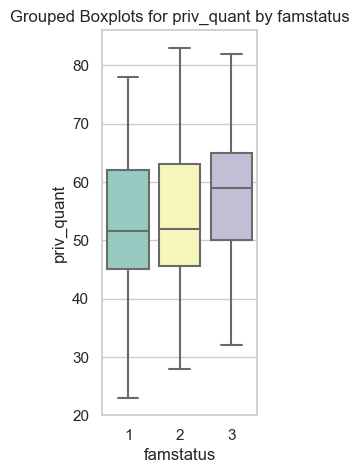

In [116]:
quant_cat_analysis(df, "priv_quant", "famstatus")

ANOVA table:


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,1.0,1.0,1.717632,1.717632,4.430543,0.036316
1,2.0,1.0,1.103379,1.103379,4.430543,0.036316


Significance(positivity and sex):



0    True
1    True
Name: PR(>F), dtype: bool

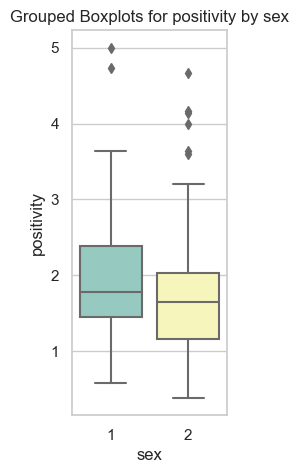

In [117]:
quant_cat_analysis(df, "positivity", "sex")

## Exercise 3
Apply supervised learning on a quantitative outcome variable (recommended: Flow). With a linear regression model and a K nearest neighbors regressor (KNN) model

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         248 non-null    int64   
 1   education   248 non-null    int64   
 2   sex         248 non-null    category
 3   famstatus   248 non-null    category
 4   pro_cat     248 non-null    category
 5   pro_quant   248 non-null    int64   
 6   priv_cat    248 non-null    category
 7   priv_quant  248 non-null    int64   
 8   positivity  248 non-null    float64 
 9   flow        248 non-null    int64   
 10  pos_cat     248 non-null    category
dtypes: category(5), float64(1), int64(5)
memory usage: 13.7 KB


In [119]:
categorical_features = df.select_dtypes(include=["category"]).columns.tolist()
quantitive_features = (
    df.select_dtypes(exclude=["category"]).drop(columns="flow", axis=1).columns.tolist()
)

In [120]:
predictors = pd.get_dummies(
    df.drop(columns=["flow"], axis=1),
    columns=["sex", "famstatus", "education", "pro_cat", "priv_cat", "pos_cat"],
    drop_first=True,
)
target = df["flow"]

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    predictors,
    target,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [122]:
from sklearn.linear_model import LinearRegression

# fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

# evaluate the performance
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"lr train_mse : {train_mse}")
print(f"lr test_mse : {test_mse}")
print(f"lr train_r2 : {train_r2}")
print(f"lr test_r2 : {test_r2}")

lr train_mse : 23.282429612542302
lr test_mse : 34.2519688214407
lr train_r2 : 0.4663195363849406
lr test_r2 : 0.19140772376202297


In [124]:
from sklearn.neighbors import KNeighborsRegressor

# fit the knn model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [125]:
# evaluate the performance
train_preds_knn = knn_model.predict(X_train)
test_preds_knn = knn_model.predict(X_test)

train_mse_knn = mean_squared_error(y_train, train_preds_knn)
test_mse_knn = mean_squared_error(y_test, test_preds_knn)
train_r2_knn = r2_score(y_train, train_preds_knn)
test_r2_knn = r2_score(y_test, test_preds_knn)

print(f"KNN train_mse : {train_mse_knn}")
print(f"KNN test_mse : {test_mse_knn}")
print(f"KNN train_r2 : {train_r2_knn}")
print(f"KNN test_r2 : {test_r2_knn}")

KNN train_mse : 24.798383838383838
KNN test_mse : 31.383999999999997
KNN train_r2 : 0.43157079376958707
KNN test_r2 : 0.2591123701605287


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score

median_flow = df["flow"].median()
target_cat = (df["flow"] > median_flow).astype(int)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target_cat, test_size=0.2, random_state=42
)

# Train and evaluate the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_train_predictions = logistic_model.predict(X_train)
logistic_predictions = logistic_model.predict(X_test)

# Train and evaluate the KNN classifier model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_train_predictions = knn_classifier.predict(np.ascontiguousarray(X_train))
knn_classifier_predictions = knn_classifier.predict(np.ascontiguousarray(X_test))

# Metrics for Logistic Regression
logistic_train_accuracy = accuracy_score(y_train, logistic_train_predictions)
logistic_test_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_train_recall = recall_score(y_train, logistic_train_predictions)
logistic_test_recall = recall_score(y_test, logistic_predictions)
logistic_train_roc = roc_auc_score(y_train, logistic_model.predict_proba(X_train)[:, 1])
logistic_test_roc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Metrics for KNN
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_classifier_predictions)
knn_train_recall = recall_score(y_train, knn_train_predictions)
knn_test_recall = recall_score(y_test, knn_classifier_predictions)
knn_train_roc = roc_auc_score(
    y_train, knn_classifier.predict_proba(np.ascontiguousarray(X_train))[:, 1]
)
knn_test_roc = roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1])

metrics_data = {
    "Model": ["Logistic Regression", "KNN"],
    "Train Accuracy": [logistic_train_accuracy, knn_train_accuracy],
    "Test Accuracy": [logistic_test_accuracy, knn_test_accuracy],
    "Train Recall": [logistic_train_recall, knn_train_recall],
    "Test Recall": [logistic_test_recall, knn_test_recall],
    "Train ROC AUC": [logistic_train_roc, knn_train_roc],
    "Test ROC AUC": [logistic_test_roc, knn_test_roc],
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.782828,0.74,0.730337,0.692308,0.844552,0.802885
1,KNN,0.752525,0.64,0.741573,0.576923,0.841253,0.736378


In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data for better performance of K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

# Apply K-means clustering
n_clusters = 3  # We'll start with 3 clusters as an initial choice
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Analyze the relationship between clusters and flourishing states (flow scores)
cluster_flow_summary = df.groupby("cluster")["flow"].describe()

cluster_flow_summary

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,55.0,37.854545,5.458321,26.0,34.5,37.0,42.0,48.0
1,90.0,29.733333,6.218494,13.0,26.0,30.0,33.0,43.0
2,103.0,33.145631,5.814802,20.0,29.0,33.0,37.5,46.0


In [131]:
# Group by the cluster and calculate the mean for each predictor variable
cluster_mean_values = df.groupby("cluster").mean()

# Drop 'flow' column as it's the target variable we used for interpretation
cluster_mean_values = cluster_mean_values.drop(columns=["flow"])

cluster_mean_values

,age,education,pro_quant,priv_quant,positivity
cluster,,,,,
0,45.618182,4.418182,65.709091,68.563636,2.772496
1,38.511111,6.000000,44.600000,51.566667,1.458801
2,42.359223,3.514563,47.805825,53.135922,1.610099


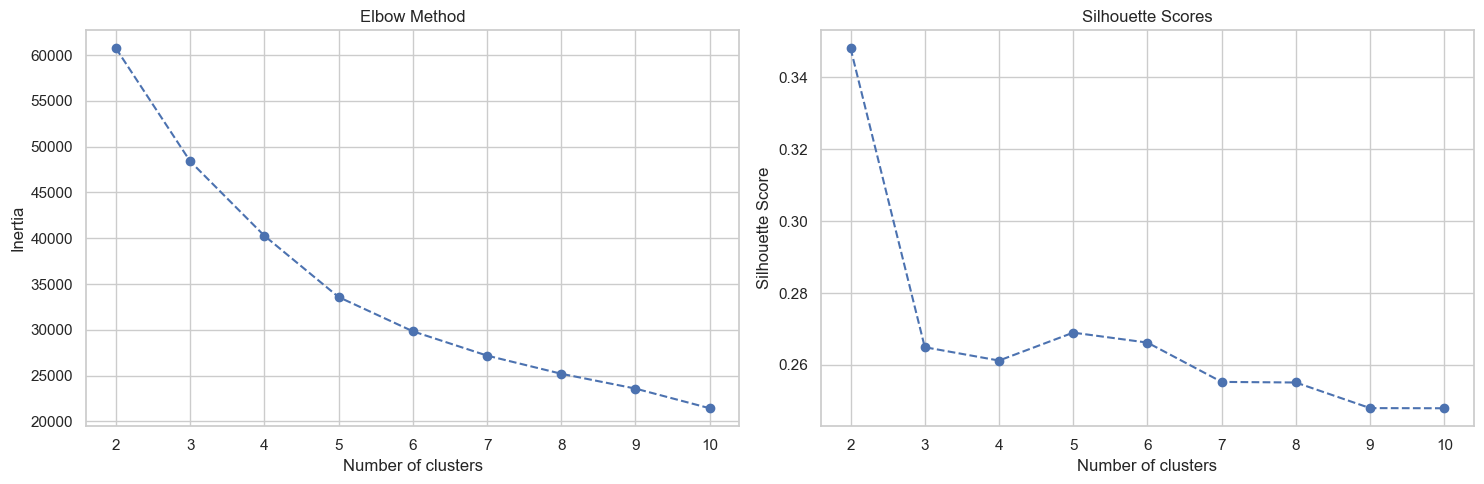

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans clustering on the observations
inertia = []
silhouette_scores = []
clusters_range = range(2, 11)

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(predictors)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(predictors, cluster_labels))

# Plotting the Elbow method and Silhouette scores to find optimal number of clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow method
ax1.plot(clusters_range, inertia, marker="o", linestyle="--")
ax1.set_title("Elbow Method")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia")

# Silhouette scores
ax2.plot(clusters_range, silhouette_scores, marker="o", linestyle="--")
ax2.set_title("Silhouette Scores")
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [138]:
# Transpose the scaled data for clustering columns
X_scaled_transposed = X_scaled.T

# Apply K-means clustering on the transposed data
kmeans_columns = KMeans(n_clusters=2, random_state=42)
column_clusters = kmeans_columns.fit_predict(X_scaled_transposed)

# Pair columns with their respective clusters
column_cluster_pairs = list(zip(predictors.columns, column_clusters))

column_cluster_pairs

[('age', 0),
 ('pro_quant', 0),
 ('priv_quant', 0),
 ('positivity', 0),
 ('sex_2', 1),
 ('famstatus_2', 1),
 ('famstatus_3', 0),
 ('education_2', 0),
 ('education_3', 0),
 ('education_4', 0),
 ('education_5', 0),
 ('education_6', 1),
 ('pro_cat_2', 1),
 ('pro_cat_3', 0),
 ('priv_cat_2', 1),
 ('priv_cat_3', 0),
 ('pos_cat_2', 1),
 ('pos_cat_3', 0),
 ('pos_cat_4', 0)]

In [135]:
# Transpose the scaled data for clustering columns
X_scaled_transposed = X_scaled.T

# Apply K-means clustering on the transposed data
kmeans_columns = KMeans(n_clusters=3, random_state=42)
column_clusters = kmeans_columns.fit_predict(X_scaled_transposed)

# Pair columns with their respective clusters
column_cluster_pairs = list(zip(predictors.columns, column_clusters))

column_cluster_pairs

[('age', 1),
 ('pro_quant', 1),
 ('priv_quant', 1),
 ('positivity', 1),
 ('sex_2', 2),
 ('famstatus_2', 2),
 ('famstatus_3', 0),
 ('education_2', 1),
 ('education_3', 2),
 ('education_4', 1),
 ('education_5', 2),
 ('education_6', 0),
 ('pro_cat_2', 2),
 ('pro_cat_3', 1),
 ('priv_cat_2', 2),
 ('priv_cat_3', 1),
 ('pos_cat_2', 2),
 ('pos_cat_3', 1),
 ('pos_cat_4', 1)]

In [136]:
# Transpose the scaled data for clustering columns
X_scaled_transposed = X_scaled.T

# Apply K-means clustering on the transposed data
kmeans_columns = KMeans(n_clusters=4, random_state=42)
column_clusters = kmeans_columns.fit_predict(X_scaled_transposed)

# Pair columns with their respective clusters
column_cluster_pairs = list(zip(predictors.columns, column_clusters))

column_cluster_pairs

[('age', 0),
 ('pro_quant', 0),
 ('priv_quant', 0),
 ('positivity', 0),
 ('sex_2', 3),
 ('famstatus_2', 3),
 ('famstatus_3', 2),
 ('education_2', 3),
 ('education_3', 1),
 ('education_4', 3),
 ('education_5', 0),
 ('education_6', 2),
 ('pro_cat_2', 1),
 ('pro_cat_3', 0),
 ('priv_cat_2', 1),
 ('priv_cat_3', 0),
 ('pos_cat_2', 1),
 ('pos_cat_3', 0),
 ('pos_cat_4', 0)]